In [30]:
data = read.csv('data/gtex_filtered2.csv', head=TRUE)
library('IHW')

In [31]:
data$group = groups_by_filter(data$x_value2, nbins = 20)

In [32]:
n_group = length(table(data$group))

In [37]:
threshold = numeric(n_group + 1)
for (i in seq(1, n_group-1, 1)) {
    low = max(data$x_value2[data$group == i])
    high = min(data$x_value2[data$group == i+1])
    threshold[i+1] = (low + high) / 2
}
threshold[1] = min(data$x_value2[data$group == 1]) - 1
threshold[n_group + 1] = max(data$x_value2[data$group == n_group]) + 1



In [38]:
threshold

[1] -1.00000000  0.05840097  0.09549198  0.15537850  0.24137632  0.32244575
 [7]  0.42768312  0.59150198  0.75283018  0.88583152  1.07397801  1.17124298
[13]  1.38354057  1.48455473  1.63159072  1.85614173  2.11541179  2.39315679
[19]  2.81421040  3.38608374  8.25276242

In [39]:
m_groups = as.table(setNames(c(716265.0,557125.0,662287.0,657806.0,509410.0,443997.0,547850.0,464797.0,411762.0,498784.0,251086.0,584836.0,348203.0,386085.0,611819.0,598006.0,555987.0,656070.0,605814.0,555904.0), 1:20))

In [40]:
ihwRes <- ihw(data$p_value , as.factor(data$group), alpha = 0.1, m_groups = m_groups, nfolds=5L)

In [41]:
rejections(ihwRes)

[1] 32195

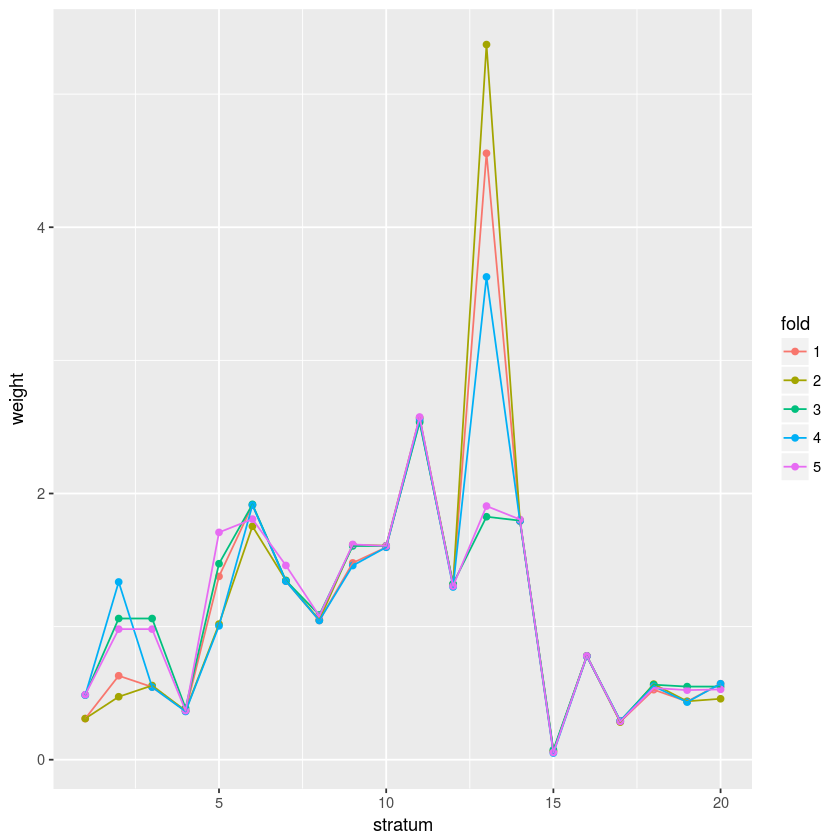

In [42]:
plot(ihwRes)